In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("DOGE-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [3]:
df.size

12327

In [4]:
df.shape

(1761, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [6]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [12]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)
df.set_index('Date', inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20732\2343857244.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)


In [13]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


<Axes: xlabel='Date'>

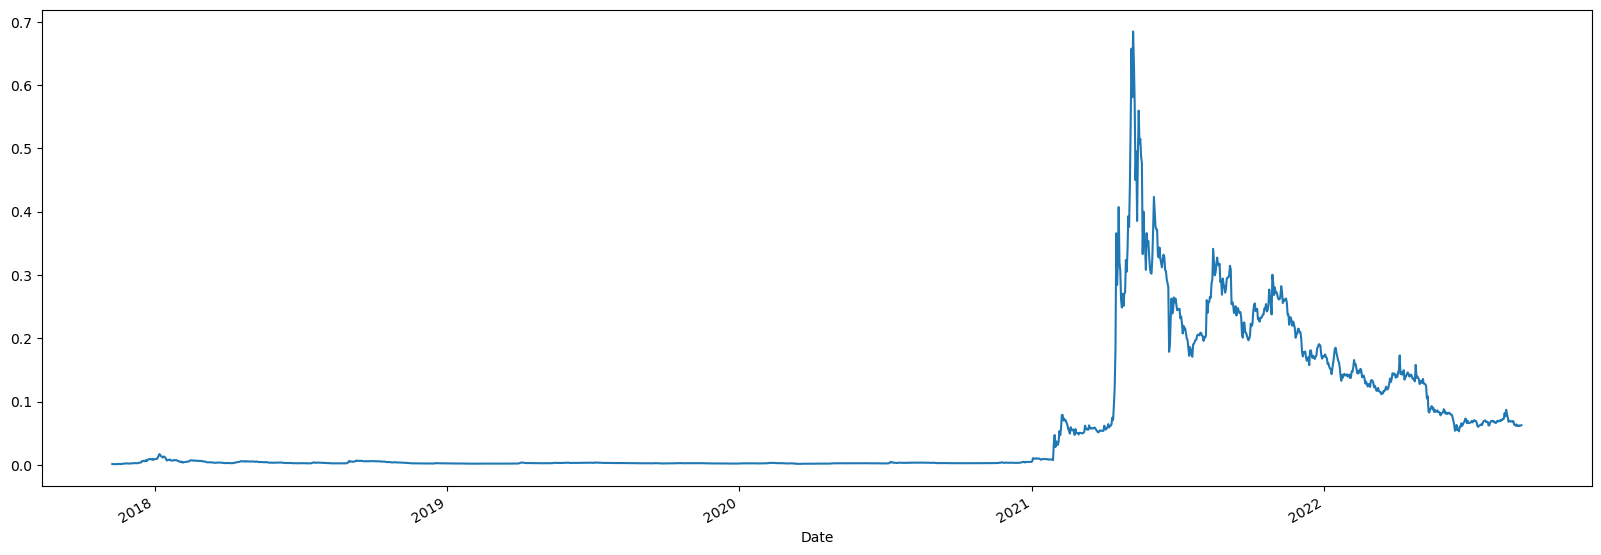

In [14]:
plt.figure(figsize = (20,7))
x = df.groupby('Date')['Close'].mean()
x.plot()

In [15]:
df["gap"] = (df["High"] - df["Low"]) * df["Volume"]
df["y"] = df["High"]/ df["Volume"]
df["z"] = df["Low"] /df["Volume"]
df["a"] = df["High"] / df["Low"]
df["b"] = (df["High"] / df["Low"]) * df["Volume"]


In [16]:
abs(df.corr())["Close"].sort_values(ascending = False)

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
y            0.063868
z            0.063251
Name: Close, dtype: float64

In [17]:
df1 = df[["Close","Volume","a","b"]]
df1.head()

,Close,Volume,a,b
Date,,,,
2017-11-09,0.001415,6259550.0,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,1.189401,2.951226e+06


In [18]:
df2 = df1.tail(30)
X = df2[:11]
y = df2[-19:]

In [19]:
X.shape

(11, 4)

In [20]:
y.shape

(19, 4)

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog = X["Close"], exog = X.drop("Close", axis = 1), order = (2,1,1))
model_sar= model.fit()

C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\statsmodels\

In [24]:
model_sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  26.754
Date:                Sat, 03 Feb 2024   AIC                            -39.509
Time:                        18:15:53   BIC                            -37.391
Sample:                    08-05-2022   HQIC                           -41.832
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume     -7.068e-11   3.25e-12    -21.758      0.000   -7.71e-11   -6.43e-11
a             -0.0531   1.94e-15  -2.74e+13      0.000      -0.053      -0.053
b           6.908e-11    2.7e-12     25.581      0.000    6.38e-11    7.44e-11
ar.L1              -0   2.94e-16         -0      1.000   -5.76e-16    5.76e-16
ar.L2               0   2.64e-15          0      1.000   -5.17e-15    5.17e-15
ma.L1              -0   2.94e-16         -0      1.000   -5.76e-16    5.76e-16
sigma2      2.026e-07   1.28e-08     15.842      0.000    1.78e-07    2.28e-07
===================================================================================
Ljung-Box (L1) (Q):                   2.22   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.14   Prob(JB):                         0.66
Heteroskedasticity (H):               1.47   Skew:                            -0.29
Prob(H) (two-sided):                  0.76   Kurtosis:                         1.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.4e+42. Standard errors may be unstable.
"""

In [26]:
start = 11
end = 29
y_pred = model_sar.predict(start = start, end = end, exog = y.drop("Close", axis = 1))
y_pred

2022-08-16    0.087488
2022-08-17    0.077574
2022-08-18    0.075603
2022-08-19    0.077553
2022-08-20    0.075979
2022-08-21    0.075897
2022-08-22    0.075546
2022-08-23    0.076154
2022-08-24    0.076089
2022-08-25    0.075709
2022-08-26    0.075590
2022-08-27    0.076328
2022-08-28    0.075775
2022-08-29    0.075658
2022-08-30    0.075100
2022-08-31    0.075885
2022-09-01    0.075882
2022-09-02    0.076133
2022-09-03    0.077045
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

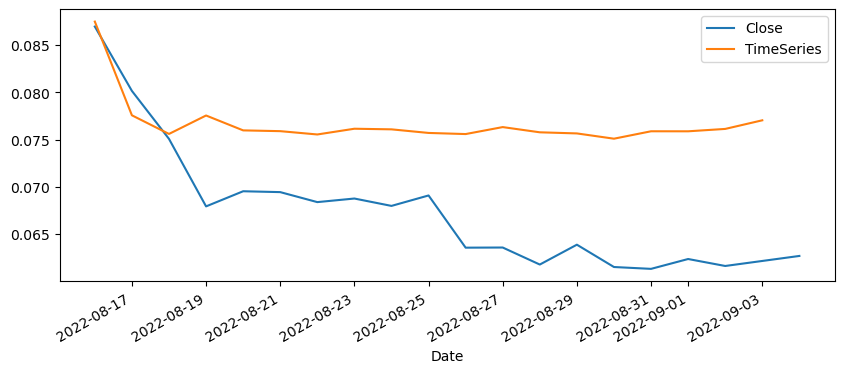

In [28]:
y["Close"].plot(legend = True, figsize = (10,4))
y_pred.plot(label ="TimeSeries", legend = True)